<a href="https://colab.research.google.com/github/tienhuynhqlcn2k1/Datascience/blob/main/CLustering_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drive

In [63]:
import matplotlib
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#LIB

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Code


<Figure size 720x432 with 0 Axes>

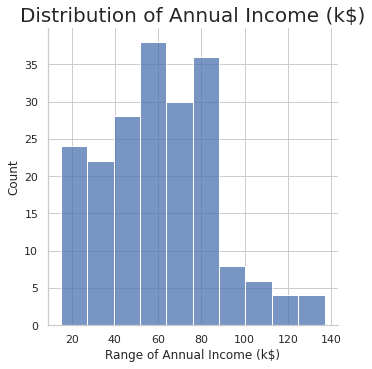

<Figure size 720x432 with 0 Axes>

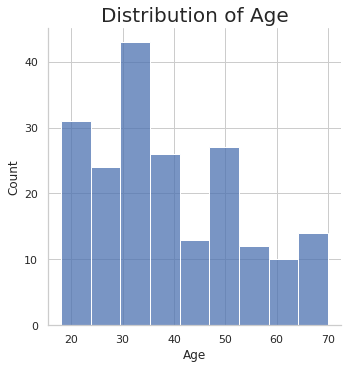

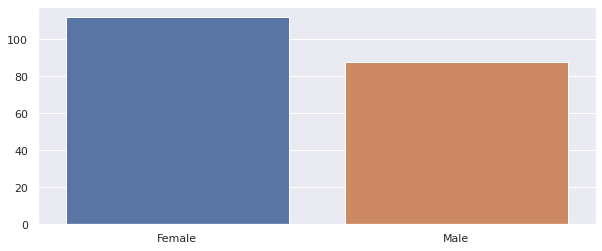

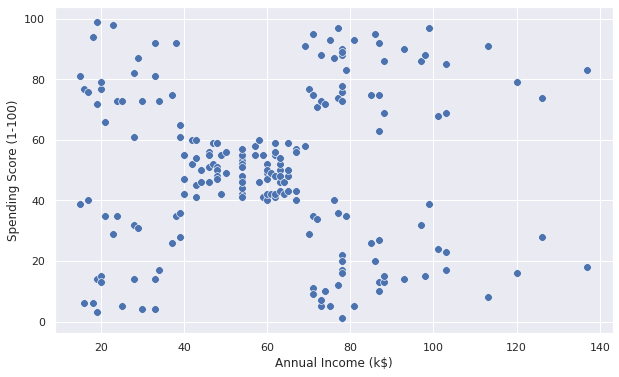

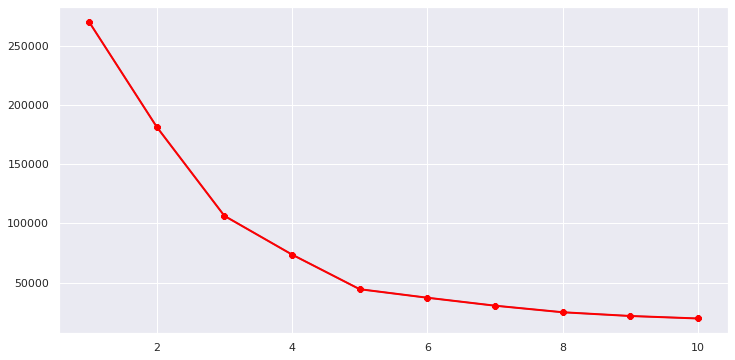

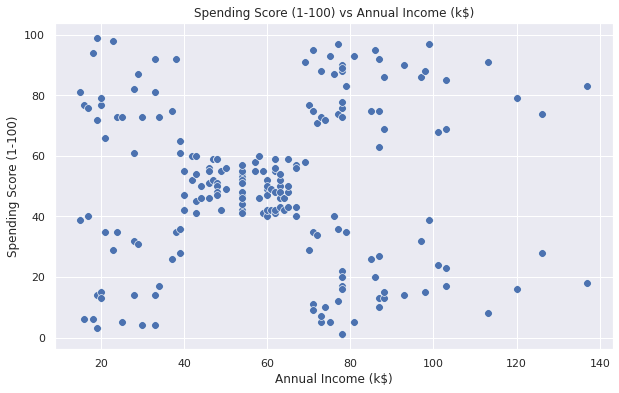

In [149]:

linkFile ='My drive/Clustering/Mall_Customers.csv'
data = pd.read_csv("drive/MyDrive/Clustering/Mall_Customers.csv")

data.head()
data.corr()
#Distribution of Annual Income
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.displot(data['Annual Income (k$)'])
plt.title("Distribution of Annual Income (k$)",fontsize=20)
plt.xlabel("Range of Annual Income (k$)")
plt.ylabel("Count")
# plt.show()
#Age Distribution
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.displot(data['Age'])
plt.title("Distribution of Age",fontsize=20)
#plt.show()
#Gender Analysis
genders= data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()
#Clustering base on 2 features
#We take just the annual income and spending score
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)", "Spending Score (1-100)"]]
#The Input data
X.head()
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data = X, s=60)
#importing KMeans from sklearn
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(X)
  wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth=2, color="red",marker="8")
#plt.xticks(np.arrange(1,11,1))
#plt.xlable("K Value")
#plt.yvalue(wcss)
plt.show()
#Taking 5 cluster
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the inout data
y=km1.predict(X)
df1["label"] = y
#The new dataframe with the clustering donw
df1.head()
#Scatterplot the cluster
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', palette=['green','orange','brown','blue','red'],legend='full',data=df1,s=60)
hue="lable"
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()